**Bisection (binary search) in sorted lists**
-----

**Problem:**  
Find experimental (obs) peaks nearest to a predicted (calc) transition by their frequency value.  
Let the calc frequency be _x_ and the obs frequencies be _freq_ == [...],  len(_freq_) = _n_.
  
**Naive idea:**  
Check each _f in freq_ to be near _x_ in O(_n_) time.  
  
**Bisection:**  
If _freq_ is sorted, recursively divide it in halfs and find the insertion position of _x_ into _freq_ to be between _i_ and _i + 1_.<br>
These positions indicate the two nearest experimental peaks.  
We only have to take O(log(_n_)) steps for that.  
Then, inspect the neighbourhood.

In [7]:
import random
import bisect

class BaseFrequencyListTest:
    def __init__(self, n):
        self.lower = 10.0    # GHz
        self.higher = 300.0  # GHz
        self.eps    = 0.1    # GHz
        self.freq = sorted((random.uniform(self.lower, self.higher) for _ in range(0, n)))
        self.x = random.uniform(self.lower, self.higher)
        
        
class NaiveSearchFrequencyTest(BaseFrequencyListTest): 
    def run(self):
        assignments = []
        
        for f in self.freq:
            if abs(f - self.x) <= self.eps:
                assignments.append(f)

                
class BisectSearchFrequencyTest(BaseFrequencyListTest): 
    def run(self):
        assignments = []
        i_nearest = bisect.bisect_left(self.freq, self.x)

        for f in self.freq[i_nearest:]:
            if abs(f - self.x) <= self.eps:
                assignments.append(f)
            else:
                break
                
        for f in reversed(self.freq[:i_nearest]):
            if abs(f - self.x) <= self.eps:
                assignments.append(f)
            else:
                break
            

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import time


def my_timeit_with_setup(TestClass, n, T):    
    """
        TestClass: class[name] of test case
        T: number of test runs
    """
    results = []
    for _ in range(0, T):
        test = TestClass(n)  
        t1 = time.process_time()
        test.run()        
        t2 = time.process_time()
        results.append((t2-t1))        
    
    return np.mean(results)*1e6


def plot_time_vs_n(TestClass, n_max=2000, T=10, **kwargs):
    """
        TestClass(n): class[name] of test case
        
        n_max: 
               to investigate dependence on n, we use
               range(start=n_max/10, stop=n_max, step=n_max/100)
               
        T: number of test runs per data point 
        
        **kwargs: passed to plt.plot (plot color etc.)
    """  
    xxx = []
    yyy = []
    for n in range(n_max//10, n_max, n_max//100):
        xxx.append(n)
        yyy.append(my_timeit_with_setup(TestClass, n, T))
    
    plt.xlabel("n")
    plt.ylabel("time / usec")
    return plt.plot(xxx, yyy, **kwargs)

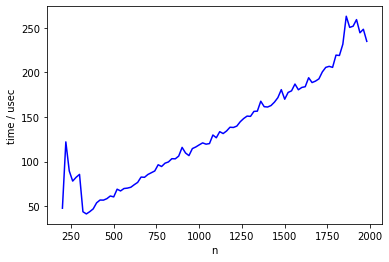

In [35]:
plot_time_vs_n(NaiveSearchFrequencyTest, color='blue');

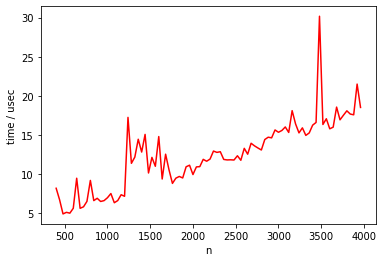

In [33]:
plot_time_vs_n(BisectSearchFrequencyTest, n_max=4000, color='red');

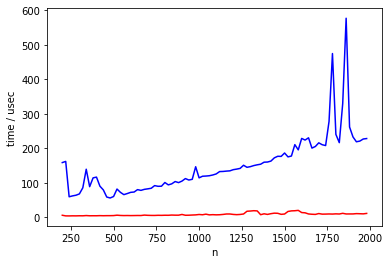

In [34]:
plot_time_vs_n(NaiveSearchFrequencyTest, color='blue');
plot_time_vs_n(BisectSearchFrequencyTest, color='red');